![](https://www.complexityexplorer.org/assets/logo-0648a26b449617269a5781d6cce055e46eac5b625f8659f55957b01a2967e4f3.svg)
# Santa Fe Institute
## Complexity Explorer
### Simple Harmonic Oscillator - Euler Solvers
Flows III

In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$ \overrightharpoon{X_{t_0 + \Delta t}} = \overrightharpoon{X_{t_0}} + \Delta t * \overrightharpoon{X'_{t_0}} $$

In [2]:
def sho_explicit_euler(k, m, beta, ic, delta_t, g, steps):
    x, v = ic
    result = ic

    for step in range(steps):
        x_prime = v
        v_prime = g - (beta / m) * v - (k / m) * x

        result = np.vstack([
            result,
            np.array(
                np.array([x, v]) + delta_t * np.array([x_prime, v_prime]))
        ])
        x, v = result[-1, :]

    return result

$$ \overrightharpoon{X} (t_0 + \Delta t) = \overrightharpoon{X}(t_0) + \Delta t * \overrightharpoon{X'_{FE}}(t_0 + \Delta t) $$

In [3]:
def sho_implicit_euler(k, m, beta, ic, delta_t, g, steps):
    x, v = ic
    result = ic

    for step in range(steps):
        x_fe, v_fe = sho_explicit_euler(k, m, beta, [x, v], delta_t, g,
                                        1)[-1, :]
        x_fe_prime = v_fe
        v_fe_prime = g - (beta / m) * v - (k / m) * x_fe
        fe_prime = np.array([x_fe_prime, v_fe_prime])

        result = np.vstack(
            [result, np.array(np.array([x, v]) + delta_t * fe_prime)])
        x, v = result[-1, :]

    return result

In [4]:
sho_explicit_euler(2, 0.5, 0, [-1, -2], 0.1, 0, 5)

array([[-1.     , -2.     ],
       [-1.2    , -1.6    ],
       [-1.36   , -1.12   ],
       [-1.472  , -0.576  ],
       [-1.5296 ,  0.0128 ],
       [-1.52832,  0.62464]])

In [5]:
sho = sho_explicit_euler(2, 0.5, 0, [-1, -2], 0.1, 0, 200)
plt.plot(sho)

In [6]:
sho2 = sho_explicit_euler(2, 0.5, 0, [-1, -2], 0.11, 0, 200)

plt.figure()
plt.plot(sho[:, 0], sho[:, 1], label="$\Delta t = 0.1$")
plt.plot(sho2[:, 0], sho2[:, 1], label="$\Delta t = 0.11$")
plt.xlabel("$x$")
plt.ylabel("$v$")
plt.legend()

In [7]:
sho_implicit_euler(2, 0.5, 0, [-1, -2], 0.1, 0, 5)

array([[-1.        , -2.        ],
       [-1.16      , -1.52      ],
       [-1.2656    , -0.9952    ],
       [-1.314496  , -0.449152  ],
       [-1.30683136,  0.09461248],
       [-1.24509686,  0.61356052]])

In [8]:
sho = sho_implicit_euler(2, 0.5, 0, [-1, -2], 0.1, 0, 200)
sho2 = sho_implicit_euler(2, 0.5, 0, [-1, -2], 0.11, 0, 200)

In [9]:
plt.figure()
plt.plot(sho[:, 0], sho[:, 1], label="$\Delta t = 0.1$")
plt.plot(sho2[:, 0], sho2[:, 1], label="$\Delta t = 0.11$")
plt.xlabel("$x$")
plt.ylabel("$v$")
plt.legend()

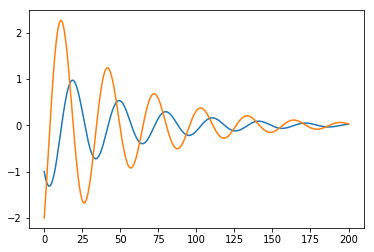

In [10]:
plt.plot(sho)

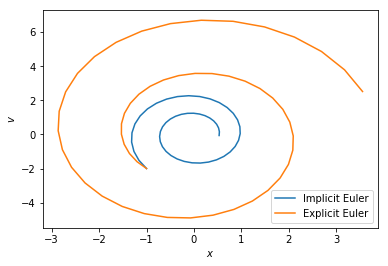

In [11]:
sho_implicit = sho_implicit_euler(2, 0.5, 0, [-1, -2], 0.1, 0, 50)
sho_explicit = sho_explicit_euler(2, 0.5, 0, [-1, -2], 0.1, 0, 50)

plt.figure()
plt.plot(sho_implicit[:, 0], sho_implicit[:, 1], label="Implicit Euler")
plt.plot(sho_explicit[:, 0], sho_explicit[:, 1], label="Explicit Euler")
plt.xlabel("$x$")
plt.ylabel("$v$")
plt.legend()

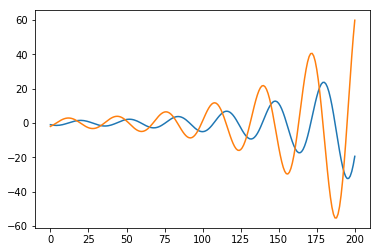

In [12]:
better_sho_model = (sho_implicit_euler(2, 0.5, 0, [-1, -2], 0.1, 0, 200) +
                    sho_explicit_euler(2, 0.5, 0, [-1, -2], 0.1, 0, 200)) / 2
plt.plot(better_sho_model)

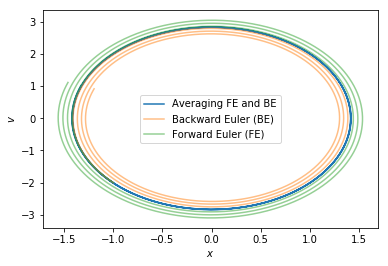

In [13]:
better_sho_model = (
    sho_implicit_euler(2, 0.5, 0, [-1, -2], 0.005, 0, 2000) +
    sho_explicit_euler(2, 0.5, 0, [-1, -2], 0.005, 0, 2000)) / 2

sho_implicit = sho_implicit_euler(2, 0.5, 0, [-1, -2], 0.005, 0, 2000)
sho_explicit = sho_explicit_euler(2, 0.5, 0, [-1, -2], 0.005, 0, 2000)

plt.figure()
plt.plot(
    better_sho_model[:, 0],
    better_sho_model[:, 1],
    label="Averaging FE and BE")
plt.plot(
    sho_implicit[:, 0],
    sho_implicit[:, 1],
    alpha=0.5,
    label="Backward Euler (BE)")
plt.plot(
    sho_explicit[:, 0],
    sho_explicit[:, 1],
    alpha=0.5,
    label="Forward Euler (FE)")
plt.xlabel("$x$")
plt.ylabel("$v$")
plt.legend()